<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/kassie-preprocessing/padded_skipped_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
skipped_values = np.load('/content/drive/My Drive/capstone/skipped_values_DCT.npy')
consecutive_values = np.load('/content/drive/My Drive/capstone/consecutive_values_DCT.npy')

In [8]:
!pip install tslearn

     |████████████████████████████████| 778kB 5.1MB/s 


**1. Clustering with Skipped Multi-Scale** 

In [9]:
from tslearn.clustering import TimeSeriesKMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [87]:
#Skipped values
km_skipped = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter=5,random_state=0).fit(skipped_values)
clusters_skipped = km_skipped.predict(skipped_values)

In [88]:
#Dictionnaries with keys = clusters, values = list of the chunks in that cluster
dict_skipped = {}

for i in range(0,10):
  dict_skipped[i] = list()

for ind, arr in enumerate(skipped_values):
  dict_skipped[clusters_skipped[ind]].append(arr)

In [89]:
copy_skipped = dict_skipped

In [90]:
#Number of chunks in each cluster
clusters_n = [len(j) for j in dict_skipped.values()]
clusters_n

[408, 264, 359, 364, 406, 605, 507, 452, 329, 306]

In [91]:
#Create a dataframe with each column = mean of the values of each chunk in the cluster for that day
for i in range(0,10):
  #Concatenate all arrays into dataframe
  dict_skipped[i] = pd.DataFrame(np.concatenate(dict_skipped[i], axis=1)).replace(0,np.nan) 

for i in range(0,10):
  #Compute the mean for each scale
  col_con = dict_skipped[i].loc[:,0::3]
  col_2s = dict_skipped[i].loc[:,1::3]
  col_3s = dict_skipped[i].loc[:,2::3]

  dict_skipped[i] = pd.concat([col_con.mean(axis=1), col_2s.mean(axis=1), col_3s.mean(axis=1)], axis =1).replace(np.nan, 0)
  dict_skipped[i].columns = ['consecutive_mean', 'two_step_mean', 'three_step_mean']

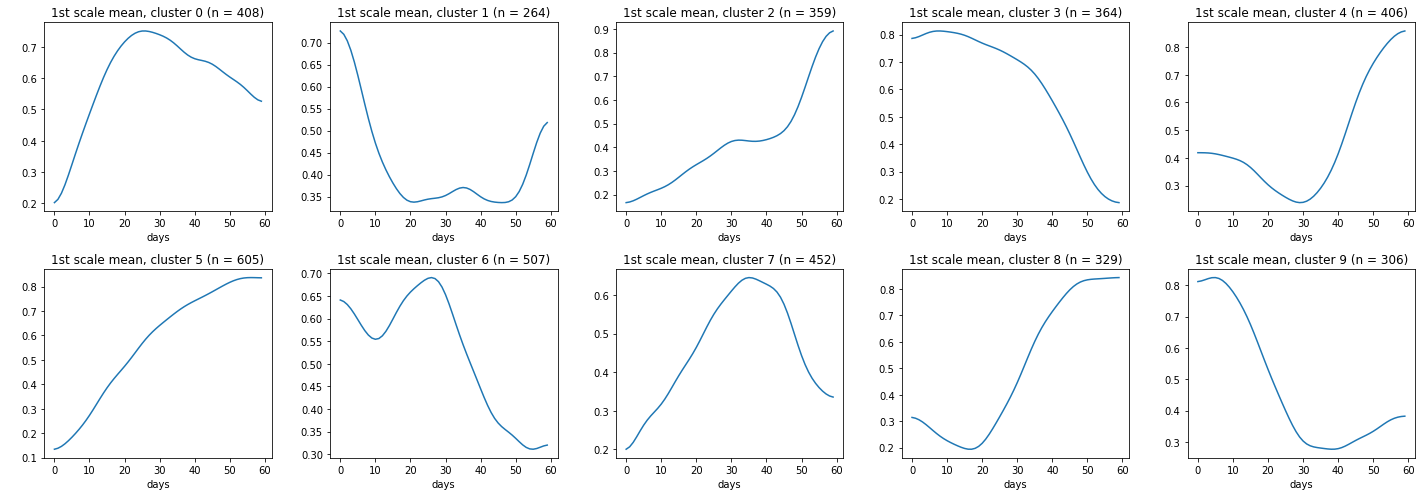

In [92]:
#Plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize = (20,7))

for i in range(0,10):
  if i < 5:
    sns.lineplot(data = dict_skipped[i]['consecutive_mean'], ax = ax[0, int(i)])
    ax[0,int(i)].set_title('1st scale mean, cluster ' + str(i) + ' (n = '+ str(clusters_n[int(i)])+')')
    ax[0,int(i)].set_ylabel(' ')
    ax[0,int(i)].set_xlabel('days')
  
  else:
    sns.lineplot(data = dict_skipped[i]['consecutive_mean'], ax = ax[1, int(5-i)])
    ax[1,int(i-5)].set_title('1st scale mean, cluster ' + str(i) + ' (n = '+ str(clusters_n[int(i)])+')')
    ax[1,int(i-5)].set_ylabel(' ')
    ax[1,int(i-5)].set_xlabel('days')

plt.tight_layout()

**2. Clustering with Consecutive Multi-Scale Values**

In [93]:
#Consecutive values
km_consecutive = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter=5,random_state=0).fit(consecutive_values)
clusters_consecutive = km_consecutive.predict(consecutive_values)

In [94]:
#Dictionnaries with keys = clusters, values = list of the chunks in that cluster
dict_cons = {}

for i in range(0,10):
  dict_cons[i] = list()

for ind, arr in enumerate(consecutive_values):
  dict_cons[clusters_consecutive[ind]].append(arr)

In [95]:
#Number of chunks in each cluster
clusters_n_cons = [len(j) for j in dict_cons.values()]
clusters_n_cons

[292, 464, 576, 388, 355, 214, 336, 298, 791, 286]

In [96]:
#Create a dataframe with each column = mean of the values of each chunk in the cluster for that day
for i in range(0,10):
  #Concatenate all arrays into dataframe
  dict_cons[i] = pd.DataFrame(np.concatenate(dict_cons[i], axis=1)).replace(0,np.nan) 

for i in range(0,10):
  #Compute the mean for each scale
  col_20 = dict_cons[i].loc[:,0::3]
  col_40 = dict_cons[i].loc[:,1::3]
  col_60 = dict_cons[i].loc[:,2::3]

  dict_cons[i] = pd.concat([col_20.mean(axis=1), col_40.mean(axis=1), col_60.mean(axis=1)], axis =1).replace(np.nan, 0)
  dict_cons[i].columns = ['20d_mean', '40d_mean', '60d_mean']

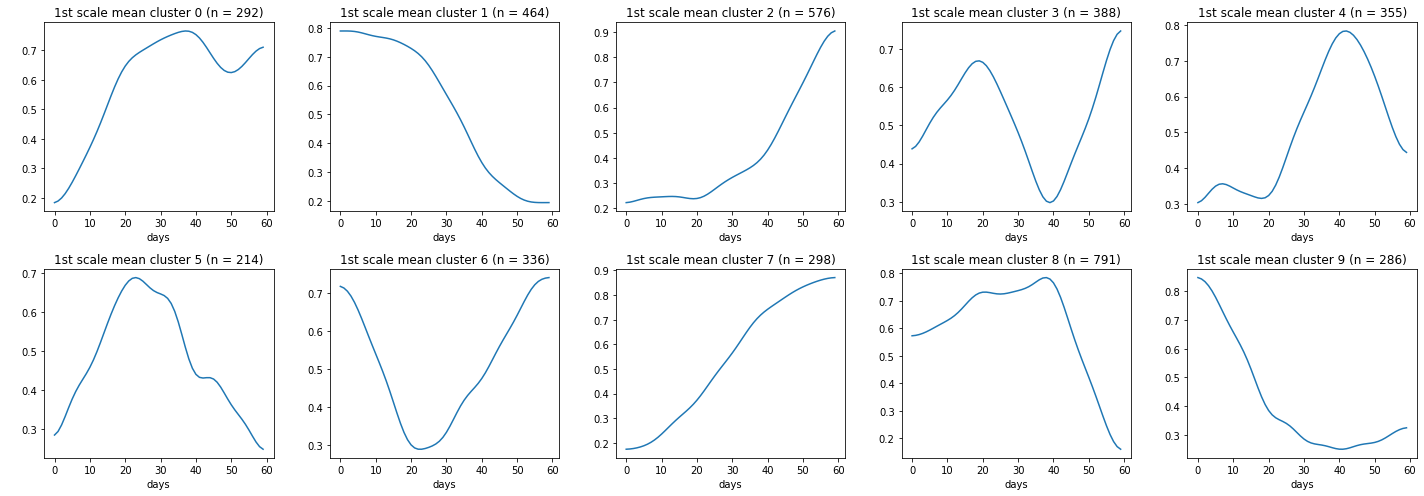

In [97]:
#Plotting the results
fig, ax = plt.subplots(2, 5, figsize = (20,7))

for i in dict_cons.keys():
  if i < 5:
    sns.lineplot(data = dict_cons[i]['60d_mean'], ax = ax[0, int(i)])
    ax[0,int(i)].set_title('1st scale mean cluster ' + str(i) + ' (n = '+ str(clusters_n_cons[int(i)])+')')
    ax[0,int(i)].set_ylabel(' ')
    ax[0,int(i)].set_xlabel('days')

  else:
    sns.lineplot(data = dict_cons[i]['60d_mean'], ax = ax[1, int(5-i)])
    ax[1,int(i-5)].set_title('1st scale mean cluster ' + str(i) + ' (n = '+ str(clusters_n_cons[int(i)])+')')
    ax[1,int(i-5)].set_ylabel(' ')
    ax[1,int(i-5)].set_xlabel('days')

plt.tight_layout()

### Silhouette score


In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score as chs

In [4]:
from matplotlib.ticker import MaxNLocator

In [99]:
X_train_skipped = skipped_values
y_train_skipped = clusters_skipped

In [100]:
X_train_padded = consecutive_values
y_train_padded = clusters_consecutive

In [1]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score as chs

def sil_sample_cluster(data, col1, col2, thresh):
  '''
  computes the percentage of silhouette scores about a threshold within each cluster
  (input) data: DataFrame; col1: str refering to cluster column; col2: str refering to silhouette scores column; thresh: float between -1 and 1
  (output) ss_scores; dictionary
  '''
  ss_scores = {}
  for i in range(data[col1].nunique()):
    subs = data[data[col1]==i]
    ss_thresh = subs[subs[col2]>=thresh]
    ss_scores[i] = len(ss_thresh)/len(subs)
  
  return ss_scores

In [2]:
def one_dimention(X):
  return [i[:,0] for i in X]


## skipped values

In [103]:
silhouette_scores_skipped_60 = silhouette_samples(one_dimention(X_train_skipped), y_train_skipped)

silhouette_scores_skipped_mean = pd.DataFrame(silhouette_scores_skipped_60,columns = ['silhouette_score'])

clusters_ss = pd.concat([pd.DataFrame(y_train_skipped, columns= ['cluster']), silhouette_scores_skipped_mean], axis = 1)
clusters_ss.head() 

sil_sample_cluster(clusters_ss, 'cluster', 'silhouette_score', 0.1) #0 for all

{0: 0.23529411764705882,
 1: 0.18181818181818182,
 2: 0.403899721448468,
 3: 0.8653846153846154,
 4: 0.3891625615763547,
 5: 0.8330578512396695,
 6: 0.6745562130177515,
 7: 0.6792035398230089,
 8: 0.20364741641337386,
 9: 0.0196078431372549}

In [104]:
score = []
silhouette = []
max_cluster = 10

X_train_skipped = skipped_values
for k in range(2, max_cluster):
  cl = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=5,random_state=0)
  y_train_skipped = cl.fit_predict(X_train_skipped)
  s_60 = silhouette_score(one_dimention(X_train_skipped), y_train_skipped)
  silhouette.append(s_60)
  

Text(0.5, 1.0, 'Silhouette score')

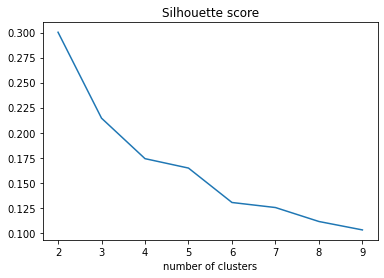

In [107]:
fig, ax = plt.subplots()

ax.plot(list(range(2, max_cluster)), silhouette)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('number of clusters')
ax.set_title(f'Silhouette score')


## padded


In [108]:
silhouette_scores_padded_60 = silhouette_samples(one_dimention(X_train_padded), y_train_padded)


silhouette_scores_padded_mean = pd.DataFrame(silhouette_scores_padded_60, columns = ['silhouette_score'])

clusters_ss = pd.concat([pd.DataFrame(y_train_padded, columns= ['cluster']), silhouette_scores_padded_mean], axis = 1)
clusters_ss.head() 

sil_sample_cluster(clusters_ss, 'cluster', 'silhouette_score', 0.1) #0 for all

{0: 0.1404109589041096,
 1: 0.5086206896551724,
 2: 0.3506944444444444,
 3: 0.21391752577319587,
 4: 0.22535211267605634,
 5: 0.13551401869158877,
 6: 0.22916666666666666,
 7: 0.40939597315436244,
 8: 0.900126422250316,
 9: 0.013986013986013986}

In [112]:
score = []
silhouette = []
max_cluster=20
X_train_padded = consecutive_values
for k in range(2, max_cluster):
  cl = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=5, random_state=0)
  y_train_padded = cl.fit_predict(X_train_padded)
  s_60 = silhouette_score(one_dimention(X_train_padded), y_train_padded)
  silhouette.append(s_60)
  

Text(0.5, 1.0, 'Silhouette score')

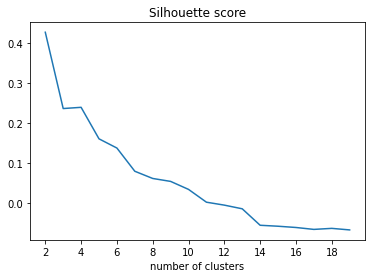

In [113]:
fig, ax = plt.subplots()

ax.plot(list(range(2, max_cluster)), silhouette)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('number of clusters')
ax.set_title(f'Silhouette score')

### tslearn Silhouette score


In [10]:
X_train = skipped_values[:2000]

In [11]:
from tslearn.clustering import silhouette_score

score = []
silhouette = []
max_cluster= 15

for k in range(2, max_cluster):
  
  cl = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=5, random_state=0,
                        n_jobs = -1)
  y_train_skipped = cl.fit_predict(X_train)
  print("Completed clustering ... " ) 
  s_60 = silhouette_score(one_dimention(X_train), y_train_skipped,  metric="dtw",
                          n_jobs = -1) 
  silhouette.append(s_60) 
  print("Completed k = {}".format(k)) 

Completed clustering ... 
Completed k = 2
Completed clustering ... 
Completed k = 3
Completed clustering ... 
Completed k = 4
Completed clustering ... 
Completed k = 5
Completed clustering ... 
Completed k = 6
Completed clustering ... 
Completed k = 7
Completed clustering ... 
Completed k = 8
Completed clustering ... 
Completed k = 9
Completed clustering ... 
Completed k = 10
Completed clustering ... 
Completed k = 11
Completed clustering ... 
Completed k = 12
Completed clustering ... 
Completed k = 13
Completed clustering ... 
Completed k = 14


Text(0.5, 1.0, 'Silhouette score')

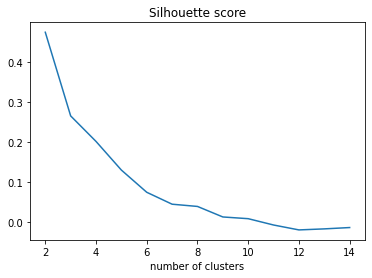

In [12]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()

ax.plot(list(range(2, max_cluster)), silhouette)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('number of clusters')
ax.set_title(f'Silhouette score')

In [13]:
! pip install kneed

In [14]:
from kneed import KneeLocator

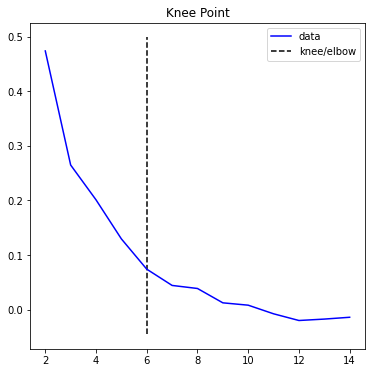

In [15]:
kneedle = KneeLocator(list(range(2,max_cluster)), silhouette, 
                      S =1.0, curve='convex', direction='decreasing')
kneedle.plot_knee()

In [16]:
kneedle.knee_y

0.07397685102666895

In [ ]:
from tslearn.metrics import cdist_dtw
cross_similarity = cdist_dtw(X_train, n_jobs = -1, verbose = 1)


In [ ]:
optimal_k = kneedle.knee
sil_score = kneedle.knee_y
model = TimeSeriesKMeans(n_clusters=optimal_k, metric = 'dtw')
model.fit(X_train)
y_train_pred = model.predict(X_train)

silouette_coeff = silhouette_samples(cross_similarity, y_train_pred, metric='precomputed')



In [ ]:
! pip install yellowbrick